In [3]:
# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os

from matplotlib.pyplot import title
from scipy.ndimage import label
from scipy.stats import alpha

In [4]:
# Importing all the yearly crime data into an array for storage
years = []
for i in range(2017, 2026, 1):
    years.append(i)

print(years)

crime_by_year = []
for year in years:
    filepath = os.path.join("..", "..", "Data", "Crime", f"Crime_Incidents_in_{year}.geojson")

    filepath = os.path.abspath(filepath)
    crime_by_year.append(gpd.read_file(filepath))


[2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]


In [5]:
# Categorizing crime

#crime25.head()
#print(crime25['OFFENSE'].unique())

violent_crime = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']
property_crime = ['THEFT/OTHER', 'THEFT F/AUTO', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ARSON']
non_car_property_crime = ['THEFT/OTHER', 'BURGLARY', 'ARSON'] # removed car related
car_related_crime = ['MOTOR VEHICLE THEFT', 'THEFT F/AUTO']

In [6]:
# One-hot encode a column for violent_crime, property_crime and car_related_crime
for data in crime_by_year:
    # Violent Crime
    data['violent_crime'] = data['OFFENSE'].isin(violent_crime).astype(int)
    # Property Crime
    data['property_crime'] = data['OFFENSE'].isin(property_crime).astype(int)
    # Car Related Crime
    data['car_related_crime'] = data['OFFENSE'].isin(car_related_crime).astype(int)
    # Non-car Property Crime
    data['non_car_property_crime'] = data['OFFENSE'].isin(non_car_property_crime).astype(int)
#crime_by_year[0].head()

In [8]:
# Collect crime count data by year into a df
counts_violent_crime = []
counts_property_crime = []
counts_car_related_crime = []
counts_non_car_property_crime = []

for data in crime_by_year:
    counts_violent_crime.append(data['violent_crime'].sum())
    counts_property_crime.append(data['property_crime'].sum())
    counts_car_related_crime.append(data['car_related_crime'].sum())
    counts_non_car_property_crime.append(data['non_car_property_crime'].sum())

d = {'year': years,
     'violent_crime': counts_violent_crime,
     'property_crime': counts_property_crime,
     'car_related_crime': counts_car_related_crime,
     'non_car_property_crime': counts_non_car_property_crime}
agg_crime_data = pd.DataFrame(d)

In [9]:
agg_crime_data

,year,violent_crime,property_crime,car_related_crime,non_car_property_crime
0,2017,4432,28662,12663,15999
1,2018,4140,29706,14045,15661
2,2019,4176,29793,12933,16860
3,2020,4005,23926,11543,12383
4,2021,4113,24208,12141,12067
5,2022,3834,23328,11508,11820
6,2023,5331,28904,14534,14370
7,2024,3467,25830,11811,14019
8,2025,2477,21673,9301,12372


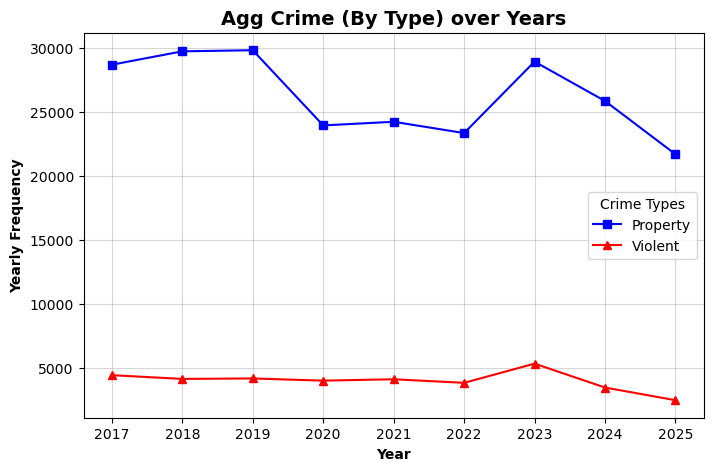

In [16]:
# Line graph for violent_crime, property_crime and car_related_crime counts over years
plt.figure(figsize = (8,5))
x = agg_crime_data['year']
plt.plot(x, agg_crime_data['property_crime'], 'bs-', label='Property')
#plt.plot(x, agg_crime_data['car_related_crime'], 'go-', label='Car Related')
plt.plot(x, agg_crime_data['violent_crime'], 'r^-', label='Violent')
plt.legend(title='Crime Types')
plt.xlabel('Year', fontsize = 10, fontweight = 'bold')
plt.ylabel('Yearly Frequency', fontsize = 10, fontweight = 'bold')
plt.title('Agg Crime (By Type) over Years', fontsize = 14, fontweight = 'bold')
plt.grid(True, alpha = 0.5)
plt.show()

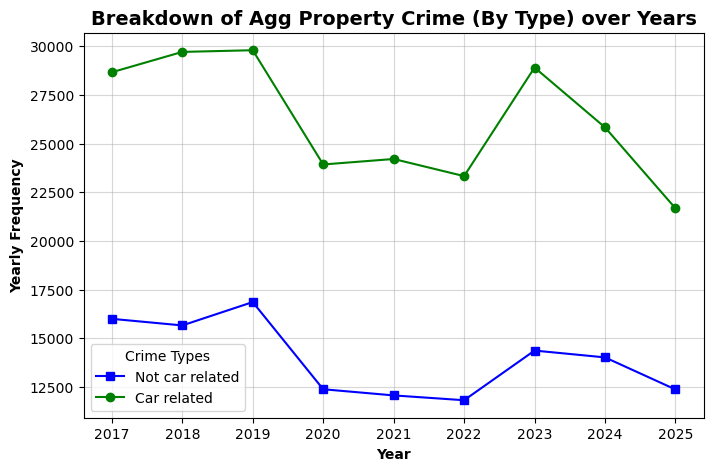

In [14]:
# Line graph separation of property crimes
plt.figure(figsize = (8,5))
x = agg_crime_data['year']
plt.plot(x, agg_crime_data['non_car_property_crime'], 'bs-', label='Not car related')
#plt.plot(x, agg_crime_data['car_related_crime'], 'go-', label='Car Related')
plt.plot(x, agg_crime_data['property_crime'], 'go-', label='Car related')
plt.legend(title='Crime Types')
plt.xlabel('Year', fontsize = 10, fontweight = 'bold')
plt.ylabel('Yearly Frequency', fontsize = 10, fontweight = 'bold')
plt.title('Breakdown of Agg Property Crime (By Type) over Years', fontsize = 14, fontweight = 'bold')
plt.grid(True, alpha = 0.5)
plt.show()